In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.losses import mse
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
newDf = pd.read_csv('/content/drive/MyDrive/SDA Codes/CVAE_final/new_final_data.csv',low_memory=False) # LOAD THE DATA HERE!

In [13]:
newDf = newDf.iloc[:, 1:]
newDf.rename(columns={'Unnamed: 0': 'EQID'}, inplace=True)

In [14]:
# Assuming df is your DataFrame
newDf = newDf.apply(pd.to_numeric, errors='coerce')
newDf = newDf.astype(float)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X = newDf[['PGA','PGD','Fp','Tsig','Ia','CAV','vs30','dir']]
column_names = X.columns
X = X[column_names].values
y = newDf[['EQID','0.01', '0.015', '0.02', '0.03', '0.04', '0.05', '0.06', '0.075',
       '0.09', '0.1', '0.15', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.75',
       '0.8', '0.9', '1', '1.2', '1.5', '2', '2.5', '3', '4']]
column_names = y.columns
y = y[column_names].values


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test= train_test_split(X_normalized, y ,test_size=0.2, random_state=42)
y_train = np.log(Y_train[:, 1:])
y_test = np.log(Y_test[:, 1:])

Enter PGA (in g): 0.0002
Enter PGD (in cm): 0.002
Enter Fp: (in s^-1)6.25
Enter Tsig (s): 2.67
Enter Ia: (in cm/s)0.00004
Enter CAV: (in cm/s)0.19
Enter Sc (1/2/3) -> (A/B/C): 1
Enter dir (0/1) -> (h/v): 0
1/1 [==============================] - 0s 98ms/step


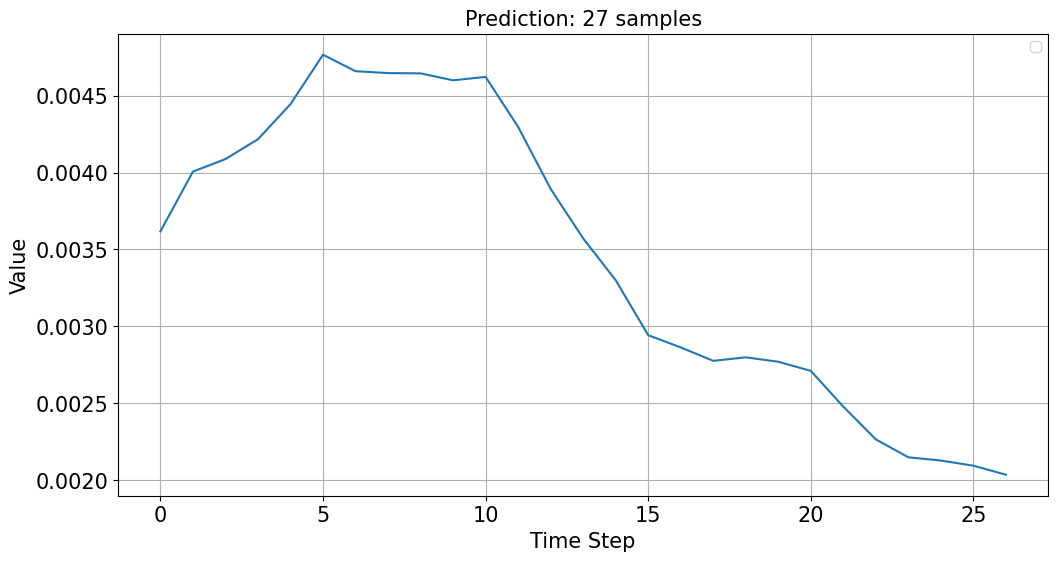

In [17]:
import numpy as np
from keras.models import load_model


# LOAD THE MODEL HERE
cvae = load_model('/content/drive/MyDrive/SDA Codes/CVAE_final/final_model/FINAL_CVAE_MODEL.h5')

PGA = float(input('Enter PGA (in g): '))
PGD = float(input('Enter PGD (in cm): '))
Fp = float(input('Enter Fp: (in s^-1)'))
Tsig = float(input('Enter Tsig (s): '))
Ia = float(input('Enter Ia: (in cm/s)'))
CAV = float(input('Enter CAV: (in cm/s)'))
vs30 = float(input('Enter Sc (1/2/3) -> (A/B/C): '))
dir = float(input('Enter dir (0/1) -> (h/v): '))

manual_input = np.array([[PGA,PGD,Fp,Tsig,Ia,CAV,vs30,dir]])


manual_input_reshaped = manual_input.reshape(1, -1)
manual_input_reshaped = scaler.transform(manual_input_reshaped)

print('prediction': np.exp(decoded_output[0]))
decoded_output = cvae.predict(manual_input_reshaped)
plt.figure(figsize=(12, 6))
plt.plot(np.exp(decoded_output[0]))
plt.xlabel('Time Sample',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title('Prediction: 27 samples',fontsize=15)
plt.tick_params(labelsize=15)
plt.legend()
plt.grid(True)
plt.show()